## **Mapeamento de Glebas Usando Séries Temporais e Long Short-Term Memory em Grandes Dados de Observação da Terras**

## **Disciplina:** CAP-421-3 Aprendizado Profundo

Gabriel Sansigolo

### Abstract

Mapas de uso e cobertura da Terra são importantes produtos para avaliação
da intervenção humana e da dinâmica ambiental. Para o trabalho busca resolver
o problema de automatização de mapeamento de regiões (Glebas) usando técnicas
de aprendizado profundo supervisionado. Para isso será usado o uma Rede Neural
Recorrente (RNNs), especificamente a rede Long Short-Term Memory (LSTM). 

Além disso, busca-se explorar como uso de séries temporais para mapeamento baseado 
em coleções de imagens de observação da Terra (EO) do catálogo do Brazil Data Cube 
(BDC). Embora existam muitas implementações para classificação de séries temporais 
usando rede LSTM, essas implementações exigem a instalação de diversas bibliotecas 
cada qual para uma função, como extração de séries temporais, download de imagens de 
satélite, treinamento do modelo etc. 

A principal contribuição deste trabalho é um biblioteca em Python para mapeamento 
de glebas usando LSTM em dados observação da Terra do BDC. Ela permitirá que os
analistas gerem de forma simples mapas de uso e cobertura da Terra para regiões
das glebas, facilitando acesso a grandes conjuntos de dados de EO. 

<!-- README.md is generated from README.Rmd. Please edit that file -->

<img src='https://github.com/GSansigolo/rennpa/blob/main/man/figures/logo.png?raw=true' align="right" height="160" />

# rennpa

<!-- badges: start -->

[![Software License](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://github.com/brazil-data-cube/rennpa/blob/master/LICENSE) [![Documentation Status](https://readthedocs.org/projects/rennpa/badge/?version=latest)](https://rennpa.readthedocs.io/en/latest/) [![Software Life Cycle](https://img.shields.io/badge/lifecycle-stable-green.svg)](https://www.tidyverse.org/lifecycle/#stable) [![Release](https://img.shields.io/github/tag/brazil-data-cube/rennpa.svg)](https://github.com/brazil-data-cube/rennpa/releases) [![Python Package Index](https://img.shields.io/pypi/v/rennpa)](https://pypi.org/project/rennpa/) [![Join us at Discord](https://img.shields.io/discord/689541907621085198?logo=discord&logoColor=ffffff&color=7389D8)](https://discord.com/channels/689541907621085198#)

<!-- badges: end -->

### Overview

**rennpa**: **RE**current **N**eural **N**etwork **P**ython **A**PI, is an Python package with a RNN ready for satellite image time series classification. The package implements a number of functions to assist the proccess of production of land use and land cover maps based on time series, all based on the Brazil Data Cube image catalog.

### Usage

**rennpa** package process to generate a LULC map can be explained using the four functions: (1) rennpa_get_timeseries; (2) rennpa_lstm; (3) rennpa_train and (4) rennpa_classify. Although these are the four main functions of the package, there are over 27 functions for each of the stages before, during and after the process of producing LULC map. 

<img src='https://github.com/GSansigolo/rennpa/blob/main/man/figures/usage.png?raw=true' align="center" height="500" />


### **Instalando o rennpa**

In [1]:
!pip install git+https://github.com/GSansigolo/rennpa

  Cloning https://github.com/GSansigolo/rennpa to /private/var/folders/2b/3r28ml1d7yj3ltn73r94__hr0000gn/T/pip-req-build-m3zz7wa3
  Running command git clone --filter=blob:none --quiet https://github.com/GSansigolo/rennpa /private/var/folders/2b/3r28ml1d7yj3ltn73r94__hr0000gn/T/pip-req-build-m3zz7wa3
  Resolved https://github.com/GSansigolo/rennpa to commit d358e12cf1345b23dca6b93975e21e6abd5e286f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### **Importando bibliotecas**

In [2]:
from rennpa import *

### **Importando amostras**

In [3]:
raw_csv = "input.csv"

### **Embaralha os dados**

In [4]:
#shuffle_data(input=raw_csv, output="input.csv")

### **Cria do objeto cubo de dados**

In [5]:
cube = dict(
    collection="S2-16D-2",
    start_date="2023-01-01",
    end_date="2023-12-31",
    freq='16D',
    bands=["B02", "B03", "B04", "B08", "NDVI", "EVI", "NBR"]
)

### **Extrai séries temporais**

In [6]:
#ts = rennpa_get_timeseries(cube, input="input.csv",output="timeseries.json")

In [7]:
ts = rennpa_open_ts_json(input="timeseries.json")

### **Cria novos indicies usando as séries temporais**

In [8]:
indicies = dict(
    OSAVI = rennpa_create_indicies(formula="OSAVI", bands=dict(NIR="B08", RED="B04"), timeseries=ts),
    NDWI =  rennpa_create_indicies(formula="NDWI", bands=dict(NIR="B08", GREEN="B03"), timeseries=ts),
    RECI = rennpa_create_indicies(formula="RECI", bands=dict(NIR="B08", RED="B04"), timeseries=ts)
)

### **Cria dataframe unindo séries temporais, amostras e índices**

In [9]:
df = rennpa_dataframe(timeseries=ts, input_csv="input.csv", indicies=indicies)

In [10]:
labels = {319: 0, 320: 1, 321: 2, 323: 3, 324: 4, 325: 5, 326: 6, 327: 7, 328: 8}

In [11]:
df['label'] = [labels[x] for x in df['label'].to_numpy()]

In [12]:
df.head()

,B02,B03,B04,B08,NDVI,OSAVI,NDWI,RECI,label
0,"[365, 5527, 808, 572, 453, 443, 1554, 360, 371...","[387, 5054, 943, 767, 652, 597, 1527, 588, 560...","[370, 4459, 855, 731, 630, 611, 1324, 531, 551...","[848, 5211, 2773, 2340, 2208, 2104, 3193, 2025...","[4762, 733, 5601, 5576, 5899, 5764, 4413, 6150...","[0.392395087673212, 0.07776500078592288, 0.528...","[-0.37327935222672065, -0.015294690696541647, ...","[2.2857142857142856, 1.1683856502242151, 3.239...",2
1,"[558, 1763, 4753, 908, 1095, 474, 493, 507, 51...","[1002, 2080, 4385, 881, 1347, 777, 753, 734, 7...","[688, 1892, 4031, 571, 1058, 672, 679, 787, 84...","[4092, 4316, 5218, 2793, 3752, 3084, 2952, 280...","[7354, 4168, 1424, 6659, 5889, 6680, 6528, 584...","[0.71211005489356, 0.39045385428210616, 0.1283...","[-0.6065959952885748, -0.34959349593495936, -0...","[5.939042089985486, 2.2799788695192817, 1.2941...",1
2,"[493, 486, 439, 327, 608, 422, 326, 329, 460, ...","[902, 871, 763, 663, 766, 730, 664, 721, 752, ...","[864, 937, 799, 725, 691, 983, 594, 627, 959, ...","[3040, 2821, 2721, 2498, 2022, 2215, 2930, 284...","[5914, 5421, 5871, 5938, 5263, 4369, 6793, 654...","[0.5573542067948035, 0.5013091512868, 0.545997...","[-0.5423642820903095, -0.528169014084507, -0.5...","[3.514450867052023, 3.0074626865671643, 3.4012...",1
3,"[3618, 346, 352, 377, 478, 386, 414, 359, 392,...","[3446, 618, 655, 628, 702, 647, 638, 627, 636,...","[3185, 631, 562, 594, 650, 659, 634, 649, 709,...","[3688, 1925, 2223, 2141, 2209, 2162, 2102, 206...","[1016, 5417, 6370, 6002, 5871, 5663, 5764, 556...","[0.07318322285528055, 0.5062280921382073, 0.59...","[-0.03392206335856462, -0.5139598898938262, -0...","[1.157564344005022, 3.045886075949367, 3.94849...",2
4,"[1147, 271, 410, 425, 292, 313, 261, 316, 321,...","[1306, 502, 632, 650, 578, 706, 662, 681, 540,...","[1101, 339, 996, 981, 429, 499, 430, 824, 1008...","[3965, 2814, 1687, 2018, 2803, 3218, 3120, 247...","[5775, 8004, 3373, 4132, 7597, 7516, 7789, 552...","[0.5653196898637233, 0.7849268670159459, 0.257...","[-0.5044583570479985, -0.6972255729794934, -0....","[3.598003629764065, 8.276470588235295, 1.69207...",5


### **Executa split no dataframe para treinamento e validação**

In [13]:
train, val = rennpa_split(df, 0.8)
      
train_ds = TimeseriesDataset(train)
val_ds = TimeseriesDataset(val)

### **Define configurações da rede**

In [14]:
input_size = 23
hidden_size = 8
num_layers = 3
output_size = 9

### **Define modelo (LSTM)**

In [15]:
model = rennpa_lstm(input_size, hidden_size, num_layers, output_size)

### **Define gradiente e otimizador**

In [16]:
criterion = rennpa_crossentropyloss()
optimizer = rennpa_adam(model.parameters(),lr=0.001)

### **Executa treinamento**

In [17]:
model_trained = rennpa_train(train_ds, val_ds, model, 200, optimizer, criterion)

  0%|          | 1/200 [00:02<09:45,  2.94s/it]

Epoch 0, Loss: 1.9595665713540869


  1%|          | 2/200 [00:05<09:14,  2.80s/it]

Epoch 1, Loss: 1.6940757355658838


  2%|▏         | 3/200 [00:08<09:09,  2.79s/it]

Epoch 2, Loss: 1.6838543259240444


  2%|▏         | 4/200 [00:11<09:00,  2.76s/it]

Epoch 3, Loss: 1.6808375712313683


  2%|▎         | 5/200 [00:14<09:11,  2.83s/it]

Epoch 4, Loss: 1.6745631297429402


  3%|▎         | 6/200 [00:16<09:01,  2.79s/it]

Epoch 5, Loss: 1.5782891434002546


  4%|▎         | 7/200 [00:19<08:52,  2.76s/it]

Epoch 6, Loss: 1.365121684043236


  4%|▍         | 8/200 [00:22<08:45,  2.74s/it]

Epoch 7, Loss: 1.253403338731504


  4%|▍         | 9/200 [00:24<08:44,  2.75s/it]

Epoch 8, Loss: 1.1916290981317657


  5%|▌         | 10/200 [00:27<08:41,  2.74s/it]

Epoch 9, Loss: 1.1552724456475452


  6%|▌         | 11/200 [00:30<08:39,  2.75s/it]

Epoch 10, Loss: 1.1282141520306954


  6%|▌         | 12/200 [00:33<08:33,  2.73s/it]

Epoch 11, Loss: 1.1140979037565344


  6%|▋         | 13/200 [00:35<08:28,  2.72s/it]

Epoch 12, Loss: 1.1035091222501268


  7%|▋         | 14/200 [00:38<08:28,  2.73s/it]

Epoch 13, Loss: 1.0778181521721135


  8%|▊         | 15/200 [00:41<08:23,  2.72s/it]

Epoch 14, Loss: 1.0597164233525593


  8%|▊         | 16/200 [00:43<08:18,  2.71s/it]

Epoch 15, Loss: 1.0369620642630883


  8%|▊         | 17/200 [00:46<08:13,  2.70s/it]

Epoch 16, Loss: 1.017971308013193


  9%|▉         | 18/200 [00:49<08:12,  2.70s/it]

Epoch 17, Loss: 0.9968988350014282


 10%|▉         | 19/200 [00:52<08:08,  2.70s/it]

Epoch 18, Loss: 0.981268520838295


 10%|█         | 20/200 [00:54<08:14,  2.75s/it]

Epoch 19, Loss: 0.980049778433407


 10%|█         | 21/200 [00:57<08:10,  2.74s/it]

Epoch 20, Loss: 0.9743596950387643


 11%|█         | 22/200 [01:00<08:09,  2.75s/it]

Epoch 21, Loss: 0.9694660504659017


 12%|█▏        | 23/200 [01:03<08:07,  2.75s/it]

Epoch 22, Loss: 0.9591733525001925


 12%|█▏        | 24/200 [01:05<08:06,  2.77s/it]

Epoch 23, Loss: 0.9488118294796912


 12%|█▎        | 25/200 [01:08<08:09,  2.80s/it]

Epoch 24, Loss: 0.9434320786420036


 13%|█▎        | 26/200 [01:11<08:09,  2.81s/it]

Epoch 25, Loss: 0.9388726583493301


 14%|█▎        | 27/200 [01:14<08:11,  2.84s/it]

Epoch 26, Loss: 0.9335934948297887


 14%|█▍        | 28/200 [01:17<08:08,  2.84s/it]

Epoch 27, Loss: 0.9279986047277263


 14%|█▍        | 29/200 [01:20<08:24,  2.95s/it]

Epoch 28, Loss: 0.9240878890542423


 15%|█▌        | 30/200 [01:23<08:22,  2.95s/it]

Epoch 29, Loss: 0.9206707991805732


 16%|█▌        | 31/200 [01:26<08:17,  2.94s/it]

Epoch 30, Loss: 0.9053943102655847


 16%|█▌        | 32/200 [01:29<08:16,  2.96s/it]

Epoch 31, Loss: 0.8999708762355879


 16%|█▋        | 33/200 [01:32<08:17,  2.98s/it]

Epoch 32, Loss: 0.903987405736462


 17%|█▋        | 34/200 [01:35<08:17,  3.00s/it]

Epoch 33, Loss: 0.8974964396626341


 18%|█▊        | 35/200 [01:38<08:16,  3.01s/it]

Epoch 34, Loss: 0.9032071637951471


 18%|█▊        | 36/200 [01:41<08:17,  3.03s/it]

Epoch 35, Loss: 0.8981287187221003


 18%|█▊        | 37/200 [01:44<08:13,  3.03s/it]

Epoch 36, Loss: 0.8903491738574957


 19%|█▉        | 38/200 [01:47<08:11,  3.03s/it]

Epoch 37, Loss: 0.8891263448334987


 20%|█▉        | 39/200 [01:50<08:08,  3.03s/it]

Epoch 38, Loss: 0.8824575426531773


 20%|██        | 40/200 [01:53<08:08,  3.05s/it]

Epoch 39, Loss: 0.908489970210331


 20%|██        | 41/200 [01:56<08:06,  3.06s/it]

Epoch 40, Loss: 0.9045032660166422


 21%|██        | 42/200 [02:00<08:04,  3.06s/it]

Epoch 41, Loss: 0.8844158252080282


 22%|██▏       | 43/200 [02:03<08:02,  3.07s/it]

Epoch 42, Loss: 0.8779931446306066


 22%|██▏       | 44/200 [02:06<07:59,  3.08s/it]

Epoch 43, Loss: 0.868393102892084


 22%|██▎       | 45/200 [02:09<07:57,  3.08s/it]

Epoch 44, Loss: 0.8648496558463651


 23%|██▎       | 46/200 [02:12<07:57,  3.10s/it]

Epoch 45, Loss: 0.8643177958095775


 24%|██▎       | 47/200 [02:15<07:54,  3.10s/it]

Epoch 46, Loss: 0.8548483490164763


 24%|██▍       | 48/200 [02:18<07:53,  3.12s/it]

Epoch 47, Loss: 0.8507657241977118


 24%|██▍       | 49/200 [02:21<07:51,  3.12s/it]

Epoch 48, Loss: 0.845417975210676


 25%|██▌       | 50/200 [02:25<07:51,  3.14s/it]

Epoch 49, Loss: 0.8475615113389259


 26%|██▌       | 51/200 [02:28<08:09,  3.28s/it]

Epoch 50, Loss: 0.8426981969596514


 26%|██▌       | 52/200 [02:32<08:45,  3.55s/it]

Epoch 51, Loss: 0.8360627461103053


 26%|██▋       | 53/200 [02:36<09:00,  3.68s/it]

Epoch 52, Loss: 0.8322565730880288


 27%|██▋       | 54/200 [02:40<08:39,  3.56s/it]

Epoch 53, Loss: 0.8312647027127883


 28%|██▊       | 55/200 [02:43<08:34,  3.55s/it]

Epoch 54, Loss: 0.829566742080489


 28%|██▊       | 56/200 [02:46<08:16,  3.45s/it]

Epoch 55, Loss: 0.8241020869585424


 28%|██▊       | 57/200 [02:50<08:05,  3.40s/it]

Epoch 56, Loss: 0.8210272792897193


 29%|██▉       | 58/200 [02:53<07:54,  3.34s/it]

Epoch 57, Loss: 0.825003629805995


 30%|██▉       | 59/200 [02:56<07:45,  3.30s/it]

Epoch 58, Loss: 0.8265635336146635


 30%|███       | 60/200 [02:59<07:41,  3.30s/it]

Epoch 59, Loss: 0.8177857578190324


 30%|███       | 61/200 [03:02<07:33,  3.26s/it]

Epoch 60, Loss: 0.8136974191353992


 31%|███       | 62/200 [03:06<07:29,  3.26s/it]

Epoch 61, Loss: 0.8193977338815827


 32%|███▏      | 63/200 [03:09<07:25,  3.25s/it]

Epoch 62, Loss: 0.8167151703554041


 32%|███▏      | 64/200 [03:12<07:24,  3.27s/it]

Epoch 63, Loss: 0.8076773511818032


 32%|███▎      | 65/200 [03:15<07:19,  3.26s/it]

Epoch 64, Loss: 0.8057087578025519


 33%|███▎      | 66/200 [03:19<07:24,  3.32s/it]

Epoch 65, Loss: 0.8002673469337762


 34%|███▎      | 67/200 [03:22<07:23,  3.34s/it]

Epoch 66, Loss: 0.7953232168372161


 34%|███▍      | 68/200 [03:26<07:18,  3.32s/it]

Epoch 67, Loss: 0.7969850523799074


 34%|███▍      | 69/200 [03:29<07:18,  3.35s/it]

Epoch 68, Loss: 0.7954685329611785


 35%|███▌      | 70/200 [03:32<07:17,  3.37s/it]

Epoch 69, Loss: 0.788383473368252


 36%|███▌      | 71/200 [03:36<07:14,  3.37s/it]

Epoch 70, Loss: 0.7840570406196943


 36%|███▌      | 72/200 [03:39<07:13,  3.39s/it]

Epoch 71, Loss: 0.7820021704910627


 36%|███▋      | 73/200 [03:43<07:12,  3.41s/it]

Epoch 72, Loss: 0.783176064491272


 37%|███▋      | 74/200 [03:46<07:14,  3.45s/it]

Epoch 73, Loss: 0.7844060558119631


 38%|███▊      | 75/200 [03:50<07:10,  3.45s/it]

Epoch 74, Loss: 0.7809810755299587


 38%|███▊      | 76/200 [03:53<07:12,  3.49s/it]

Epoch 75, Loss: 0.7812350688416974


 38%|███▊      | 77/200 [03:57<07:01,  3.43s/it]

Epoch 76, Loss: 0.778705523294561


 39%|███▉      | 78/200 [04:00<06:57,  3.43s/it]

Epoch 77, Loss: 0.7758289361311719


 40%|███▉      | 79/200 [04:03<06:48,  3.38s/it]

Epoch 78, Loss: 0.7715277628960953


 40%|████      | 80/200 [04:07<06:43,  3.36s/it]

Epoch 79, Loss: 0.7766685657251894


 40%|████      | 81/200 [04:10<06:41,  3.38s/it]

Epoch 80, Loss: 0.7688783477334415


 41%|████      | 82/200 [04:13<06:38,  3.37s/it]

Epoch 81, Loss: 0.7659303390122707


 42%|████▏     | 83/200 [04:17<06:31,  3.35s/it]

Epoch 82, Loss: 0.764956184462005


 42%|████▏     | 84/200 [04:20<06:28,  3.35s/it]

Epoch 83, Loss: 0.7852960291251637


 42%|████▎     | 85/200 [04:23<06:23,  3.34s/it]

Epoch 84, Loss: 0.7673159693580827


 43%|████▎     | 86/200 [04:27<06:21,  3.35s/it]

Epoch 85, Loss: 0.7632215206140007


 44%|████▎     | 87/200 [04:30<06:18,  3.35s/it]

Epoch 86, Loss: 0.7627322880271213


 44%|████▍     | 88/200 [04:33<06:16,  3.37s/it]

Epoch 87, Loss: 0.7614567038280512


 44%|████▍     | 89/200 [04:37<06:13,  3.36s/it]

Epoch 88, Loss: 0.7588405827291651


 45%|████▌     | 90/200 [04:40<06:07,  3.34s/it]

Epoch 89, Loss: 0.7573533852895101


 46%|████▌     | 91/200 [04:43<06:03,  3.33s/it]

Epoch 90, Loss: 0.7538310191989724


 46%|████▌     | 92/200 [04:47<05:57,  3.31s/it]

Epoch 91, Loss: 0.760699003350501


 46%|████▋     | 93/200 [04:50<05:59,  3.36s/it]

Epoch 92, Loss: 0.7538014319207933


 47%|████▋     | 94/200 [04:53<05:54,  3.34s/it]

Epoch 93, Loss: 0.7529419469677545


 48%|████▊     | 95/200 [04:57<05:56,  3.39s/it]

Epoch 94, Loss: 0.7581270621492971


 48%|████▊     | 96/200 [05:00<05:53,  3.40s/it]

Epoch 95, Loss: 0.7484361989046234


 48%|████▊     | 97/200 [05:04<05:56,  3.46s/it]

Epoch 96, Loss: 0.757102367924709


 49%|████▉     | 98/200 [05:07<05:49,  3.42s/it]

Epoch 97, Loss: 0.7554930323868795


 50%|████▉     | 99/200 [05:11<05:42,  3.40s/it]

Epoch 98, Loss: 0.755613888400832


 50%|█████     | 100/200 [05:14<05:44,  3.45s/it]

Epoch 99, Loss: 0.7497028657813477


 50%|█████     | 101/200 [05:18<05:38,  3.42s/it]

Epoch 100, Loss: 0.7441822189131594


 51%|█████     | 102/200 [05:21<05:37,  3.44s/it]

Epoch 101, Loss: 0.7418255299524544


 52%|█████▏    | 103/200 [05:24<05:32,  3.43s/it]

Epoch 102, Loss: 0.7426827510977103


 52%|█████▏    | 104/200 [05:28<05:34,  3.49s/it]

Epoch 103, Loss: 0.7479916768136368


 52%|█████▎    | 105/200 [05:31<05:28,  3.46s/it]

Epoch 104, Loss: 0.7422458132108053


 53%|█████▎    | 106/200 [05:35<05:26,  3.48s/it]

Epoch 105, Loss: 0.737902901531045


 54%|█████▎    | 107/200 [05:38<05:19,  3.43s/it]

Epoch 106, Loss: 0.7378912120083578


 54%|█████▍    | 108/200 [05:42<05:13,  3.41s/it]

Epoch 107, Loss: 0.741216879654554


 55%|█████▍    | 109/200 [05:45<05:09,  3.40s/it]

Epoch 108, Loss: 0.748919274682313


 55%|█████▌    | 110/200 [05:48<05:04,  3.39s/it]

Epoch 109, Loss: 0.7441105394581564


 56%|█████▌    | 111/200 [05:52<05:07,  3.46s/it]

Epoch 110, Loss: 0.7411426418746998


 56%|█████▌    | 112/200 [05:56<05:06,  3.49s/it]

Epoch 111, Loss: 0.7395569331505719


 56%|█████▋    | 113/200 [05:59<05:05,  3.51s/it]

Epoch 112, Loss: 0.7399265049329771


 57%|█████▋    | 114/200 [06:02<04:54,  3.43s/it]

Epoch 113, Loss: 0.76078142488704


 57%|█████▊    | 115/200 [06:06<04:47,  3.38s/it]

Epoch 114, Loss: 0.7444965200486526


 58%|█████▊    | 116/200 [06:09<04:48,  3.43s/it]

Epoch 115, Loss: 0.7470697978742762


 58%|█████▊    | 117/200 [06:13<04:50,  3.50s/it]

Epoch 116, Loss: 0.7443675729963515


 59%|█████▉    | 118/200 [11:48<2:20:51, 103.07s/it]

Epoch 117, Loss: 0.7411421958137961


 60%|█████▉    | 119/200 [11:51<1:38:39, 73.08s/it] 

Epoch 118, Loss: 0.7374789371989132


 60%|██████    | 120/200 [11:55<1:09:37, 52.22s/it]

Epoch 119, Loss: 0.7396507582633324


 60%|██████    | 121/200 [11:58<49:31, 37.62s/it]  

Epoch 120, Loss: 0.735707510530559


 61%|██████    | 122/200 [12:01<35:25, 27.24s/it]

Epoch 121, Loss: 0.7331929206848145


 62%|██████▏   | 123/200 [12:04<25:35, 19.95s/it]

Epoch 122, Loss: 0.7290552464965122


 62%|██████▏   | 124/200 [12:08<18:52, 14.90s/it]

Epoch 123, Loss: 0.7347596217604244


 62%|██████▎   | 125/200 [12:10<14:08, 11.31s/it]

Epoch 124, Loss: 0.7307340093687469


 63%|██████▎   | 126/200 [12:14<11:03,  8.97s/it]

Epoch 125, Loss: 0.7257885445956311


 64%|██████▎   | 127/200 [12:18<08:59,  7.39s/it]

Epoch 126, Loss: 0.7238019856752134


 64%|██████▍   | 128/200 [12:21<07:19,  6.10s/it]

Epoch 127, Loss: 0.7258538872587914


 64%|██████▍   | 129/200 [12:24<06:02,  5.11s/it]

Epoch 128, Loss: 0.72519994678061


 65%|██████▌   | 130/200 [12:26<05:11,  4.45s/it]

Epoch 129, Loss: 0.7238592937880871


 66%|██████▌   | 131/200 [12:29<04:36,  4.01s/it]

Epoch 130, Loss: 0.7209561213948368


 66%|██████▌   | 132/200 [12:32<04:08,  3.65s/it]

Epoch 131, Loss: 0.7239475826811946


 66%|██████▋   | 133/200 [12:35<03:47,  3.40s/it]

Epoch 132, Loss: 0.7205119729042053


 67%|██████▋   | 134/200 [12:38<03:32,  3.22s/it]

Epoch 133, Loss: 0.916330480497647


 68%|██████▊   | 135/200 [12:41<03:21,  3.09s/it]

Epoch 134, Loss: 0.8198825810469833


 68%|██████▊   | 136/200 [12:44<03:12,  3.01s/it]

Epoch 135, Loss: 0.7339704730152304


 68%|██████▊   | 137/200 [12:46<03:07,  2.98s/it]

Epoch 136, Loss: 0.7290814491658429


 69%|██████▉   | 138/200 [12:49<03:02,  2.94s/it]

Epoch 137, Loss: 0.7252462907554278


 70%|██████▉   | 139/200 [12:52<03:00,  2.96s/it]

Epoch 138, Loss: 0.7223548335966721


 70%|███████   | 140/200 [12:55<02:58,  2.97s/it]

Epoch 139, Loss: 0.7221057025435703


 70%|███████   | 141/200 [12:58<02:52,  2.93s/it]

Epoch 140, Loss: 0.7222683495945401


 71%|███████   | 142/200 [13:01<02:47,  2.89s/it]

Epoch 141, Loss: 0.7203029164301804


 72%|███████▏  | 143/200 [13:04<02:43,  2.87s/it]

Epoch 142, Loss: 0.7169651747529023


 72%|███████▏  | 144/200 [13:07<02:41,  2.88s/it]

Epoch 143, Loss: 0.7158657250061534


 72%|███████▎  | 145/200 [13:10<02:39,  2.91s/it]

Epoch 144, Loss: 0.7157452749271019


 73%|███████▎  | 146/200 [13:13<02:39,  2.95s/it]

Epoch 145, Loss: 0.7205245783126432


 74%|███████▎  | 147/200 [13:16<02:40,  3.02s/it]

Epoch 146, Loss: 0.7186591177204855


 74%|███████▍  | 148/200 [13:19<02:37,  3.03s/it]

Epoch 147, Loss: 0.71563033730376


 74%|███████▍  | 149/200 [13:22<02:34,  3.03s/it]

Epoch 148, Loss: 0.7121044545391806


 75%|███████▌  | 150/200 [13:25<02:32,  3.05s/it]

Epoch 149, Loss: 0.7120608071875728


 76%|███████▌  | 151/200 [13:28<02:31,  3.10s/it]

Epoch 150, Loss: 0.7152474475841896


 76%|███████▌  | 152/200 [13:31<02:28,  3.09s/it]

Epoch 151, Loss: 0.7116360033259672


 76%|███████▋  | 153/200 [13:34<02:23,  3.06s/it]

Epoch 152, Loss: 0.715702749934851


 77%|███████▋  | 154/200 [13:37<02:21,  3.07s/it]

Epoch 153, Loss: 0.7156522963561264


 78%|███████▊  | 155/200 [13:41<02:21,  3.14s/it]

Epoch 154, Loss: 0.7181180805162667


 78%|███████▊  | 156/200 [13:44<02:19,  3.17s/it]

Epoch 155, Loss: 0.732268507184546


 78%|███████▊  | 157/200 [13:47<02:15,  3.14s/it]

Epoch 156, Loss: 0.7214544076545566


 79%|███████▉  | 158/200 [13:50<02:12,  3.14s/it]

Epoch 157, Loss: 0.7198556326573191


 80%|███████▉  | 159/200 [13:53<02:10,  3.19s/it]

Epoch 158, Loss: 0.7154834021150677


 80%|████████  | 160/200 [13:57<02:08,  3.21s/it]

Epoch 159, Loss: 0.7150792257458556


 80%|████████  | 161/200 [14:00<02:06,  3.24s/it]

Epoch 160, Loss: 0.7117624547746446


 81%|████████  | 162/200 [14:03<02:02,  3.23s/it]

Epoch 161, Loss: 0.707612085576151


 82%|████████▏ | 163/200 [14:06<01:58,  3.21s/it]

Epoch 162, Loss: 0.705597765305463


 82%|████████▏ | 164/200 [14:10<01:54,  3.19s/it]

Epoch 163, Loss: 0.7063438315796696


 82%|████████▎ | 165/200 [14:13<01:54,  3.27s/it]

Epoch 164, Loss: 0.7072800273209615


 83%|████████▎ | 166/200 [14:16<01:51,  3.29s/it]

Epoch 165, Loss: 0.7130754948441499


 84%|████████▎ | 167/200 [14:20<01:51,  3.38s/it]

Epoch 166, Loss: 0.7034040175232232


 84%|████████▍ | 168/200 [14:23<01:47,  3.36s/it]

Epoch 167, Loss: 0.7042723492859235


 84%|████████▍ | 169/200 [14:26<01:43,  3.34s/it]

Epoch 168, Loss: 0.7028341963400249


 85%|████████▌ | 170/200 [14:30<01:40,  3.37s/it]

Epoch 169, Loss: 0.7006057812497507


 86%|████████▌ | 171/200 [14:34<01:40,  3.45s/it]

Epoch 170, Loss: 0.7046076238544938


 86%|████████▌ | 172/200 [14:37<01:36,  3.45s/it]

Epoch 171, Loss: 0.7059860989159229


 86%|████████▋ | 173/200 [14:40<01:32,  3.41s/it]

Epoch 172, Loss: 0.7008882733731489


 87%|████████▋ | 174/200 [14:44<01:27,  3.38s/it]

Epoch 173, Loss: 0.7004652323286518


 88%|████████▊ | 175/200 [14:47<01:24,  3.38s/it]

Epoch 174, Loss: 0.7009695483968149


 88%|████████▊ | 176/200 [14:50<01:19,  3.32s/it]

Epoch 175, Loss: 0.7026927097170961


 88%|████████▊ | 177/200 [14:54<01:16,  3.32s/it]

Epoch 176, Loss: 0.7021760632789212


 89%|████████▉ | 178/200 [14:57<01:12,  3.31s/it]

Epoch 177, Loss: 0.7023666637395721


 90%|████████▉ | 179/200 [15:00<01:10,  3.33s/it]

Epoch 178, Loss: 0.7054284121475968


 90%|█████████ | 180/200 [15:04<01:07,  3.36s/it]

Epoch 179, Loss: 0.7010181963054183


 90%|█████████ | 181/200 [15:07<01:03,  3.33s/it]

Epoch 180, Loss: 0.6997166626593646


 91%|█████████ | 182/200 [15:10<00:59,  3.33s/it]

Epoch 181, Loss: 0.6984255013902203


 92%|█████████▏| 183/200 [15:14<00:56,  3.32s/it]

Epoch 182, Loss: 0.6984924432498957


 92%|█████████▏| 184/200 [15:17<00:53,  3.33s/it]

Epoch 183, Loss: 0.6991631758758445


 92%|█████████▎| 185/200 [15:20<00:50,  3.35s/it]

Epoch 184, Loss: 0.695829327979119


 93%|█████████▎| 186/200 [15:24<00:47,  3.38s/it]

Epoch 185, Loss: 0.6996850480441175


 94%|█████████▎| 187/200 [15:27<00:44,  3.46s/it]

Epoch 186, Loss: 0.694774905450983


 94%|█████████▍| 188/200 [15:31<00:41,  3.47s/it]

Epoch 187, Loss: 0.6941792357201669


 94%|█████████▍| 189/200 [15:34<00:38,  3.47s/it]

Epoch 188, Loss: 0.6910290118136437


 95%|█████████▌| 190/200 [15:38<00:34,  3.48s/it]

Epoch 189, Loss: 0.6908475032039717


 96%|█████████▌| 191/200 [15:41<00:31,  3.47s/it]

Epoch 190, Loss: 0.6953227138207629


 96%|█████████▌| 192/200 [15:45<00:27,  3.47s/it]

Epoch 191, Loss: 0.7040978444167991


 96%|█████████▋| 193/200 [15:48<00:24,  3.45s/it]

Epoch 192, Loss: 0.70362968304578


 97%|█████████▋| 194/200 [15:52<00:20,  3.49s/it]

Epoch 193, Loss: 0.7015036422442766


 98%|█████████▊| 195/200 [15:55<00:17,  3.53s/it]

Epoch 194, Loss: 0.7019390382018744


 98%|█████████▊| 196/200 [15:59<00:14,  3.52s/it]

Epoch 195, Loss: 0.7032642259317285


 98%|█████████▊| 197/200 [16:02<00:10,  3.50s/it]

Epoch 196, Loss: 0.6958823056002847


 99%|█████████▉| 198/200 [16:06<00:06,  3.47s/it]

Epoch 197, Loss: 0.6929686408416897


100%|█████████▉| 199/200 [16:09<00:03,  3.45s/it]

Epoch 198, Loss: 0.6935134561233272


100%|██████████| 200/200 [16:12<00:00,  4.86s/it]

Epoch 199, Loss: 0.6932118094824498


### **Salva modelo treinado**

In [18]:
rennpa_save(model,'model.pth')

### **Roda modelo de forma pontual**

In [19]:
s = 140

rennpa_validade(model_trained, val_ds[s])

Predicted Label: 6


### **Calcula acuracia do modelo (F1 Score)**

In [20]:
rennpa_accuracy(model_trained, val_ds, 9)

100%|██████████| 9769/9769 [00:06<00:00, 1542.20it/s]

F1 Score is tensor(0.7513)


### **Plota matrix de confusão**

100%|██████████| 9769/9769 [00:06<00:00, 1551.71it/s]


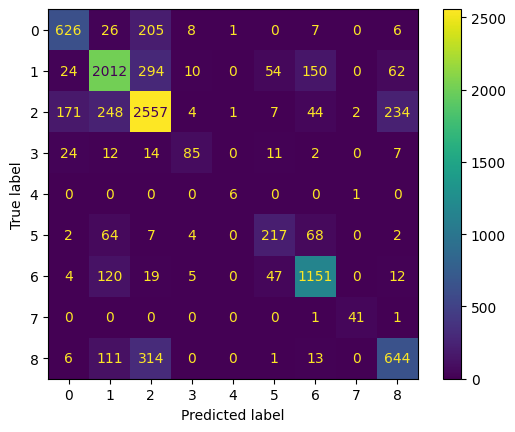

In [21]:
rennpa_confusion_matrix(model_trained, val_ds)

### **Abre uma gleba**

In [22]:
import shapely.wkt

gleba_polygon = shapely.wkt.loads("POLYGON ((-46.27456209961272 -12.652430633938323, -46.273968427698804 -12.652692678012613, -46.272936569372064 -12.651037658288033, -46.271749225544966 -12.648955076555083, -46.27059015180788 -12.646900062031833, -46.27027918080549 -12.646320793205092, -46.27104247326605 -12.645686354411424, -46.27480239538724 -12.65236167492651, -46.27456209961272 -12.652430633938323))")

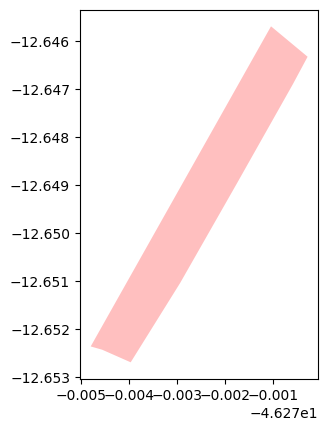

In [23]:
rennpa_plot_pts_region(gleba_polygon,[])

### **Aplica função para extração dos centroids de cada um dos pixels da gleba**

In [24]:
points = rennpa_get_pixels_from_polygon(gleba_polygon)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rennpa/rennpa.py:369: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x1, y1 = pyproj.transform(pyproj.CRS.from_epsg(4326), pyproj.CRS.from_wkt(BDC_PROJ), minx, miny, always_xy=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rennpa/rennpa.py:370: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x2, y2 = pyproj.transform(pyproj.CRS.from_epsg(4326), pyproj.CRS.from_wkt(BDC_PROJ), maxx, maxy, always_xy=True)


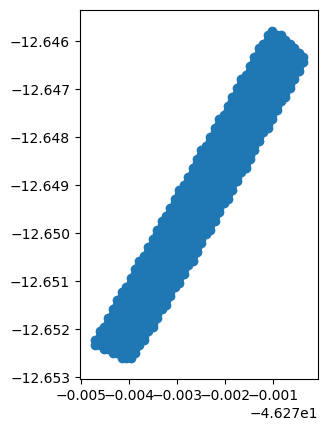

In [25]:
rennpa_plot_pts_region(gleba_polygon,points)

In [26]:
region = rennpa_get_pixels_from_bounds(gleba_polygon)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rennpa/rennpa.py:391: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x1, y1 = pyproj.transform(pyproj.CRS.from_epsg(4326), pyproj.CRS.from_wkt(BDC_PROJ), minx, miny, always_xy=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rennpa/rennpa.py:392: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x2, y2 = pyproj.transform(pyproj.CRS.from_epsg(4326), pyproj.CRS.from_wkt(BDC_PROJ), maxx, maxy, always_xy=True)


### **Executa classificação da gleba usando modelo**

In [27]:
xr_classification = rennpa_classify(cube, points, region, model)

100%|██████████| 3850/3850 [00:00<00:00, 57288.87it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [28]:
xr_classification

<xarray.Dataset> Size: 32kB
Dimensions:    (x: 50, y: 77, band: 1, time: 1)
Coordinates:
  * x          (x) float64 400B -46.27 -46.27 -46.27 ... -46.27 -46.27 -46.27
  * y          (y) float64 616B -12.65 -12.65 -12.65 ... -12.65 -12.65 -12.65
  * time       (time) <U4 16B '2023'
  * band       (band) int64 8B 1
Data variables:
    band_data  (band, time, x, y) int64 31kB 9 9 9 9 9 9 9 9 ... 9 9 9 9 9 9 9 9

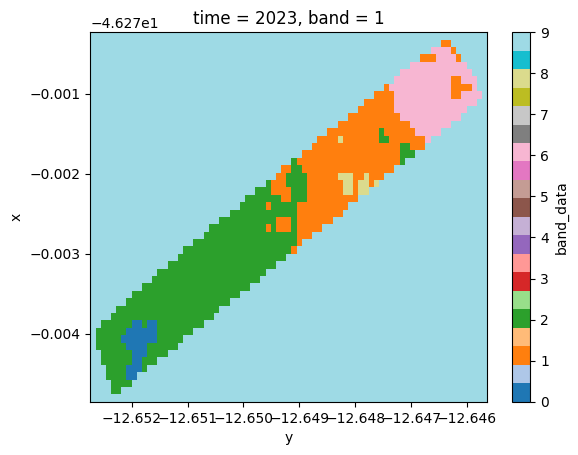

In [29]:
rennpa_plot_classification(xr_classification)